<h1 align="center"><strong>imbalanced data code</strong></h1>

<body>
    <div style = "
        width: 100%;
        height: 30px;
        background: linear-gradient(to right,rgb(235, 238, 212),rgb(235, 238, 212));">
    </div>
</body>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
from sklearn.model_selection import GridSearchCV, train_test_split , StratifiedKFold
from sklearn.exceptions import FitFailedWarning
from sklearn.ensemble import RandomForestClassifier, IsolationForest

from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler, ADASYN, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE
from imblearn.combine import SMOTETomek, SMOTEENN

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FitFailedWarning)

In [2]:
df = pd.read_csv('../data/creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.isnull().sum().sum()

0

In [8]:
display(df.duplicated().sum())
df.drop_duplicates(inplace=True)
display(df.duplicated().sum())

1081

0

Class Counts:
Class
0    283253
1       473
Name: count, dtype: int64
-------------------
Class Percentages:
Class
0    99.83329
1     0.16671
Name: proportion, dtype: float64


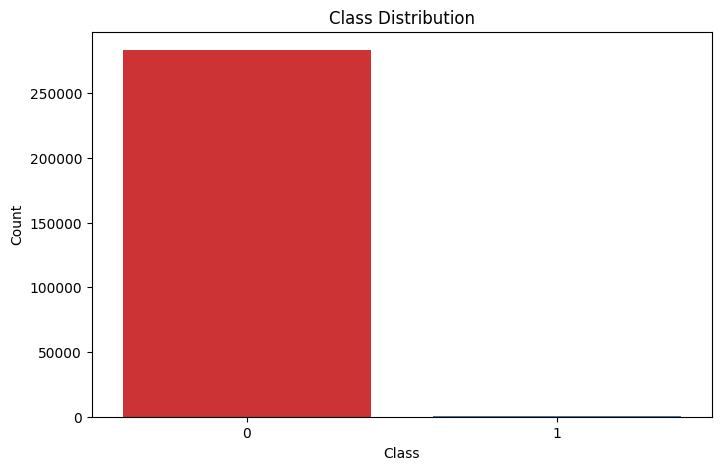

In [9]:
# Check if it is balanced or not
print("Class Counts:")
print(df['Class'].value_counts())
print('-------------------')
print("Class Percentages:")
print(df['Class'].value_counts(normalize=True) * 100)

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Class', hue='Class', palette='Set1', legend=False)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

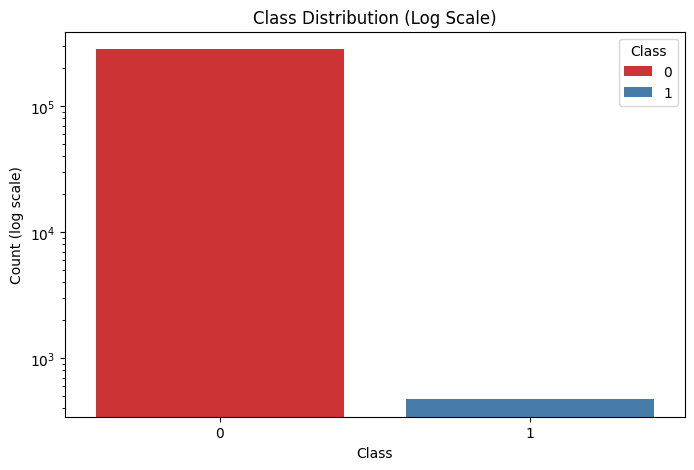

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Class',  hue='Class', palette='Set1')
plt.yscale('log')  # Logarithmic scale
plt.title('Class Distribution (Log Scale)')
plt.ylabel('Count (log scale)')
plt.xlabel('Class')
plt.show()

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7)

## **1. Logistic Regression**

In [ ]:
Model_LR = LogisticRegression()

grid = [
    {"penalty": ["l2"], "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "solver": ["lbfgs", "newton-cg"], "class_weight": [{0: 4}]},
    {"penalty": ["l1", "l2"], "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "solver": ["liblinear"], "class_weight": [{0: 4}]}
]

# Use StratifiedKFold for better class distribution in folds
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [13]:
clf = GridSearchCV(Model_LR, grid, cv=kf, n_jobs=-1, verbose=1, scoring='f1_macro', error_score='raise')

# Fit the model before accessing best_params_ and best_score_
clf.fit(X_train, y_train)

# Best parameters and score
print(f"Best Parameters          : {clf.best_params_}")
print(f"Best Cross-Validated AUC : {clf.best_score_}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters          : {'C': 1, 'class_weight': {0: 4}, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Cross-Validated AUC : 0.7784993303057753


In [ ]:
def make_prediction(classifier, X_test, y_test, title='Model'):
    print('='*50)
    print(f'- {title} prediction')
    print('='*50)
    
    y_pred = classifier.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print('-'*50)
    print(f"accuracy_score = {accuracy_score(y_test, y_pred):.3f}")
    print('-'*50)
    print(classification_report(y_test, y_pred))

In [29]:
make_prediction(clf, X_test, y_test,'Logistic Regression')

- Logistic Regression prediction
[[84969     9]
 [   84    56]]
--------------------------------------------------
accuracy_score = 0.999
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84978
           1       0.86      0.40      0.55       140

    accuracy                           1.00     85118
   macro avg       0.93      0.70      0.77     85118
weighted avg       1.00      1.00      1.00     85118



## **2. RandomForest Classifier** 

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle= True , stratify= y ,train_size=0.7 , random_state= 54)

RFclassifier = RandomForestClassifier()
RFclassifier.fit(X_train, y_train)

make_prediction(RFclassifier, X_test, y_test,'Random Forest Classifier')

- Random Forest Classifier prediction
[[84968     8]
 [   38   104]]
--------------------------------------------------
accuracy_score = 0.999
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.93      0.73      0.82       142

    accuracy                           1.00     85118
   macro avg       0.96      0.87      0.91     85118
weighted avg       1.00      1.00      1.00     85118



1- In KFold FP, FN were 80, 4. Now it has decreased to 24, 6.           
2- So Random forest are **not much impacted** by imbalanced dataset. After hyperparameter tuning we will get better result.     

## **3. RandomForest Classifier with classweight**

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle= True , stratify= y ,train_size=0.7 , random_state= 44)
y_train.value_counts()

Class
0    198277
1       331
Name: count, dtype: int64

In [32]:
# class weight, give more weight for 1 as no of 1s are less
class_weight=dict({0:1, 1: 100})

classifier = RandomForestClassifier(class_weight='balanced_subsample')
classifier.fit(X_train, y_train)

make_prediction(classifier, X_test, y_test,'Random Forest Classifier with class_weight')

- Random Forest Classifier with class_weight prediction
[[84969     7]
 [   37   105]]
--------------------------------------------------
accuracy_score = 0.999
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.94      0.74      0.83       142

    accuracy                           1.00     85118
   macro avg       0.97      0.87      0.91     85118
weighted avg       1.00      1.00      1.00     85118



## **4. Under Sampling**

* **When to use:** Large datasets with heavily imbalanced classes.
* **Pros:** Balances data, reduces training time.
* **Cons:** Risk of losing useful data, may cause overfitting.

In [39]:
X_train, X_test, y_train, y_test=train_test_split(X,y, train_size=0.7,shuffle=True, stratify=y,random_state=34)

# performing fit
ns = NearMiss()
X_res, Y_res = ns.fit_resample(X_train, y_train)

# RandomForestClassifier
rf_classifier=RandomForestClassifier()
rf_classifier.fit(X_res, Y_res)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [43]:
print('NO of class before fit',Counter(y_train))
print('NO of class after  fit',Counter(Y_res))

make_prediction(rf_classifier, X_test, y_test, 'Random Forest with NearMiss')

NO of class before fit Counter({0: 198277, 1: 331})
NO of class after  fit Counter({0: 331, 1: 331})
- Random Forest with NearMiss prediction
[[55609 29367]
 [    7   135]]
--------------------------------------------------
accuracy_score = 0.655
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.65      0.79     84976
           1       0.00      0.95      0.01       142

    accuracy                           0.65     85118
   macro avg       0.50      0.80      0.40     85118
weighted avg       1.00      0.65      0.79     85118



- Very bad accuracy, so not preferred.

## **5. Over Sampling**
* **When to use:** Small datasets with underrepresented minority class.
* **Pros:** Balances data without losing info from majority class.
* **Cons:** Risk of overfitting (duplicate samples), longer training time.


In [44]:
X_train, X_test, y_train, y_test=train_test_split(X,y, train_size=0.7, shuffle=True, stratify=y,random_state=24)

# performing fit
ns = RandomOverSampler()
X_res,Y_res=ns.fit_resample(X_train, y_train)

classifier=RandomForestClassifier()
classifier.fit(X_res, Y_res)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [45]:
print('NO of class before fit ',Counter(y_train))
print('NO of class after  fit ',Counter(Y_res))

make_prediction(classifier, X_test, y_test,'Random Forest with RandomOverSampler')

NO of class before fit  Counter({0: 198277, 1: 331})
NO of class after  fit  Counter({0: 198277, 1: 198277})
- Random Forest with RandomOverSampler prediction
[[84969     7]
 [   23   119]]
--------------------------------------------------
accuracy_score = 1.000
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.94      0.84      0.89       142

    accuracy                           1.00     85118
   macro avg       0.97      0.92      0.94     85118
weighted avg       1.00      1.00      1.00     85118



- Confusion matrix score has improved now.

## **6. SMOTETomek** 
* **When to use:** Imbalanced data with noisy or overlapping classes, especially in low-dimensional datasets.
* **Pros:** Balances data by combining **SMOTE** (synthetic minority samples) + **Tomek links** (remove noise/borderline).
* **Cons:** Performance depends on dataset; may need parameter tuning.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7)

# performing fit
ns = SMOTETomek()
X_res, Y_res = ns.fit_resample(X_train, y_train)

classifier = RandomForestClassifier()
classifier.fit(X_res, Y_res)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [47]:
# print No of class before and after
print('NO of class before fit ',Counter(y_train))
print('NO of class after  fit ',Counter(Y_res))

make_prediction(classifier, X_test, y_test,'Random Forest with SMOTETomek')

NO of class before fit  Counter({0: 198277, 1: 331})
NO of class after  fit  Counter({0: 197714, 1: 197714})
- Random Forest with SMOTETomek prediction
[[84958    18]
 [   29   113]]
--------------------------------------------------
accuracy_score = 0.999
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.86      0.80      0.83       142

    accuracy                           1.00     85118
   macro avg       0.93      0.90      0.91     85118
weighted avg       1.00      1.00      1.00     85118



## **7. Easy Ensemble** 

* **When to use:** Highly imbalanced datasets, if you can afford more computation.
* **Pros:** Builds multiple balanced subsets, reduces overfitting, improves robustness.
* **Cons:** Computationally expensive, less suitable for very large datasets.

In [48]:
X_train, X_test, y_train, y_test=train_test_split(X,y, train_size=0.7)

eec = EasyEnsembleClassifier(random_state=42)
eec.fit(X_train, y_train)

,n_estimators,10
,estimator,None
,warm_start,False
,sampling_strategy,'auto'
,replacement,False
,n_jobs,None
,random_state,42
,verbose,0


In [49]:
make_prediction(eec, X_test, y_test,'Easy Ensemble Classifier')

- Easy Ensemble Classifier prediction
[[82376  2608]
 [   12   122]]
--------------------------------------------------
accuracy_score = 0.969
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     84984
           1       0.04      0.91      0.09       134

    accuracy                           0.97     85118
   macro avg       0.52      0.94      0.53     85118
weighted avg       1.00      0.97      0.98     85118



# **8. Adaptive-SMOTE**
* **When to use:** Imbalanced datasets where the decision boundary is not well-defined.
* **Pros:** Adapts to the data distribution, can improve performance on hard-to-classify examples.
* **Cons:** More complex, may require careful tuning of parameters.

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=34)

# resample with ADASYN
adasyn = ADASYN()
X_res, Y_res = adasyn.fit_resample(X_train, y_train)

# train classifier
classifier = RandomForestClassifier(random_state=34)
classifier.fit(X_res, Y_res)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [55]:
# print class distribution
print('NO of class before fit', Counter(y_train))
print('NO of class after  fit', Counter(Y_res))

# evaluate
make_prediction(classifier, X_test, y_test, 'ADASYN with Random Forest')

NO of class before fit Counter({0: 198270, 1: 338})
NO of class after  fit Counter({0: 198270, 1: 198162})
- ADASYN with Random Forest prediction
[[84966    17]
 [   18   117]]
--------------------------------------------------
accuracy_score = 1.000
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84983
           1       0.87      0.87      0.87       135

    accuracy                           1.00     85118
   macro avg       0.94      0.93      0.93     85118
weighted avg       1.00      1.00      1.00     85118



# **9. SMOTE-ENN**
* **When to use:** Imbalanced datasets where the decision boundary is not well-defined.
* **Pros:** Combines oversampling and undersampling, can improve performance on hard-to-classify examples.
* **Cons:** More complex, may require careful tuning of parameters.


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=34)

# resample with SMOTEENN
smote_enn = SMOTEENN(random_state=34)
X_res, Y_res = smote_enn.fit_resample(X_train, y_train)

# train classifier
classifier = RandomForestClassifier(random_state=34)
classifier.fit(X_res, Y_res)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [58]:
# print class distribution
print('NO of class before fit', Counter(y_train))
print('NO of class after  fit', Counter(Y_res))

# evaluate
make_prediction(classifier, X_test, y_test, 'SMOTEENN with Random Forest')

NO of class before fit Counter({0: 198270, 1: 338})
NO of class after  fit Counter({1: 189654, 0: 180350})
- SMOTEENN with Random Forest prediction
[[84964    19]
 [   18   117]]
--------------------------------------------------
accuracy_score = 1.000
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84983
           1       0.86      0.87      0.86       135

    accuracy                           1.00     85118
   macro avg       0.93      0.93      0.93     85118
weighted avg       1.00      1.00      1.00     85118



# **10. SMOTE-Borderline**
* **When to use:** Imbalanced datasets where the decision boundary is not well-defined.
* **Pros:** Focuses on difficult-to-classify examples, can improve performance on hard-to-classify examples.
* **Cons:** More complex, may require careful tuning of parameters.

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=34)

# resample with SMOTE-Borderline
smote_borderline = BorderlineSMOTE(random_state=34)
X_res, Y_res = smote_borderline.fit_resample(X_train, y_train)

# train classifier
classifier = RandomForestClassifier(random_state=34)
classifier.fit(X_res, Y_res)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [61]:
# print class distribution
print('NO of class before fit', Counter(y_train))
print('NO of class after  fit', Counter(Y_res))

# evaluate
make_prediction(classifier, X_test, y_test, 'SMOTE-Borderline with Random Forest')

NO of class before fit Counter({0: 198270, 1: 338})
NO of class after  fit Counter({0: 198270, 1: 198270})
- SMOTE-Borderline with Random Forest prediction
[[84976     7]
 [   26   109]]
--------------------------------------------------
accuracy_score = 1.000
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84983
           1       0.94      0.81      0.87       135

    accuracy                           1.00     85118
   macro avg       0.97      0.90      0.93     85118
weighted avg       1.00      1.00      1.00     85118



# **11. KMeans-SMOTE**
* **When to use:** Imbalanced datasets where the decision boundary is not well-defined.
* **Pros:** Focuses on difficult-to-classify examples, can improve performance on hard-to-classify examples.
* **Cons:** More complex, may require careful tuning of parameters.

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7)

# resample with KMeans-SMOTE
kmeans_smote = KMeansSMOTE(
    kmeans_estimator=50,
    cluster_balance_threshold=0.001,
    random_state=34
)
X_res, Y_res = kmeans_smote.fit_resample(X_train, y_train)

# train classifier
classifier = RandomForestClassifier(random_state=34)
classifier.fit(X_res, Y_res)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [68]:
# print class distribution
print('NO of class before fit', Counter(y_train))
print('NO of class after  fit', Counter(Y_res))

# evaluate
make_prediction(classifier, X_test, y_test, 'KMeans-SMOTE with Random Forest')

NO of class before fit Counter({0: 198275, 1: 333})
NO of class after  fit Counter({1: 198300, 0: 198275})
- KMeans-SMOTE with Random Forest prediction
[[84970     8]
 [   32   108]]
--------------------------------------------------
accuracy_score = 1.000
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84978
           1       0.93      0.77      0.84       140

    accuracy                           1.00     85118
   macro avg       0.97      0.89      0.92     85118
weighted avg       1.00      1.00      1.00     85118



# **12. SVM-SMOTE**
* **When to use:** Imbalanced datasets where the decision boundary is not well-defined.
* **Pros:** Can improve performance on hard-to-classify examples.
* **Cons:** More complex, may require careful tuning of parameters.


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7)

# resample with SVM-SMOTE
svm_smote = SVMSMOTE(random_state=34)
X_res, Y_res = svm_smote.fit_resample(X_train, y_train)

# train classifier
classifier = RandomForestClassifier(random_state=34)
classifier.fit(X_res, Y_res)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [70]:
# print class distribution
print('NO of class before fit', Counter(y_train))
print('NO of class after  fit', Counter(Y_res))

# evaluate
make_prediction(classifier, X_test, y_test, 'SVM-SMOTE with Random Forest')

NO of class before fit Counter({0: 198265, 1: 343})
NO of class after  fit Counter({0: 198265, 1: 115388})
- SVM-SMOTE with Random Forest prediction
[[84982     6]
 [   34    96]]
--------------------------------------------------
accuracy_score = 1.000
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84988
           1       0.94      0.74      0.83       130

    accuracy                           1.00     85118
   macro avg       0.97      0.87      0.91     85118
weighted avg       1.00      1.00      1.00     85118



# **13. Anomaly Detection**
* **When to use:** When the minority class is very rare and can be treated as anomalies.
* **Pros:** Can effectively identify rare events, does not require balanced classes.
* **Cons:** May not work well if the minority class is not truly anomalous, requires careful tuning of parameters.

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# train Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
iso_forest.fit(X_train)

,n_estimators,100
,max_samples,'auto'
,contamination,0.01
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [72]:
# predict anomalies
y_pred = iso_forest.predict(X_test)
y_pred = np.where(y_pred == -1, 1, 0)  # map -1→1 (anomaly), 1→0 (normal)

# evaluate manually (since make_prediction calls .predict)
print('='*50)
print('- Isolation Forest for Anomaly Detection')
print('='*50)
print(confusion_matrix(y_test, y_pred))
print('-'*50)
print(f"accuracy_score = {accuracy_score(y_test, y_pred):.3f}")
print('-'*50)
print(classification_report(y_test, y_pred))

- Isolation Forest for Anomaly Detection
[[84176   808]
 [   60    74]]
--------------------------------------------------
accuracy_score = 0.990
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     84984
           1       0.08      0.55      0.15       134

    accuracy                           0.99     85118
   macro avg       0.54      0.77      0.57     85118
weighted avg       1.00      0.99      0.99     85118

